In [1]:
pip install Pillow image pandas keras tensorflow scikit-learn matplotlib opencv-python

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Görüntüleri ve etiketlerini alma
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Resim yüklenirken hata oluştu")

#Listeleri numpy dizilerine dönüştürme
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [4]:
#Splitting eğitim ve test veri kümesi
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [5]:
#Modelin oluşturulması
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Modelin derlenmesi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 135s 136ms/step - loss: 1.6322 - accuracy: 0.5863 - val_loss: 0.2551 - val_accuracy: 0.9401
Epoch 2/15
981/981 [==============================] - 125s 128ms/step - loss: 0.4191 - accuracy: 0.8887 - val_loss: 0.1155 - val_accuracy: 0.9723
Epoch 3/15
981/981 [==============================] - 110s 112ms/step - loss: 0.2805 - accuracy: 0.9243 - val_loss: 0.1246 - val_accuracy: 0.9654
Epoch 4/15
981/981 [==============================] - 121s 123ms/step - loss: 0.2354 - accuracy: 0.9392 - val_loss: 0.0574 - val_accuracy: 0.9860
Epoch 5/15
981/981 [==============================] - 117s 119ms/step - loss: 0.2436 - accuracy: 0.9383 - val_loss: 0.0522 - val_accuracy: 0.9871
Epoch 6/15
981/981 [==============================] - 124s 127ms/step - loss: 0.2281 - accuracy: 0.9444 - val_loss: 0.0489 - val_accuracy: 0.9885
Epoch 7/15
981/981 [==============================] - 110s 112ms/step - loss: 0.1913 - accuracy: 0.9525 - val_loss: 0.0774 -

In [7]:
model.save("my_model.h5")

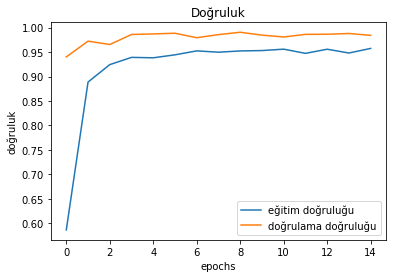

In [8]:
#doğruluk için grafikler çizme
plt.figure(0)
plt.plot(history.history['accuracy'], label='eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label='doğrulama doğruluğu')
plt.title('Doğruluk')
plt.xlabel('epochs')
plt.ylabel('doğruluk')
plt.legend()
plt.show()

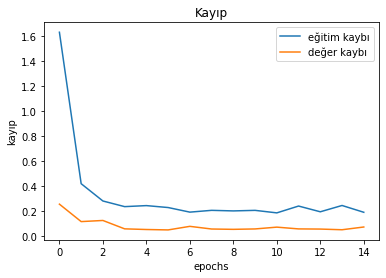

In [9]:
plt.figure(1)
plt.plot(history.history['loss'], label='eğitim kaybı')
plt.plot(history.history['val_loss'], label='değer kaybı')
plt.title('Kayıp')
plt.xlabel('epochs')
plt.ylabel('kayıp')
plt.legend()
plt.show()

In [10]:
#test veri kümesinde test doğruluğu
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

In [11]:
X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

In [12]:
#Test verileriyle doğruluk
accuracy_score(labels, pred)

0.9471892319873317

In [13]:
model.save('traffic_classifier.h5')